In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')


In [56]:
df = pd.read_csv("earthquake.csv")

### Data Understanding

In [57]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-26T09:21:07.870Z,39.302166,-123.230003,6.380000,1.41,md,8.0,98.000000,0.106500,0.010000,...,2025-11-26T09:22:43.878Z,"5 km NNW of Redwood Valley, CA",earthquake,0.430000,1.720000,0.09000,6.0,automatic,nc,nc
1,2025-11-26T09:20:52.974Z,34.300488,-97.587502,4.109524,2.09,ml,18.0,153.581558,0.113452,0.859261,...,2025-11-26T09:23:27.885Z,"9 km ESE of Loco, Oklahoma",earthquake,3.869615,2.157297,0.33000,8.0,automatic,ok,ok
2,2025-11-26T09:16:31.630Z,19.162167,-155.374329,-0.570000,1.85,md,37.0,177.000000,0.078070,0.320000,...,2025-11-26T09:21:17.020Z,"11 km ESE of Pāhala, Hawaii",earthquake,0.910000,0.250000,0.14556,9.0,automatic,hv,hv
3,2025-11-26T09:14:51.192Z,35.315437,-97.941772,7.483082,1.84,ml,13.0,67.599908,0.077673,0.709821,...,2025-11-26T09:17:00.784Z,"0 km NE of Minco, Oklahoma",earthquake,3.925934,6.247273,0.29000,12.0,automatic,ok,ok
4,2025-11-26T09:12:21.780Z,37.751335,-121.938499,4.760000,1.06,md,8.0,86.000000,0.035640,0.080000,...,2025-11-26T09:15:08.083Z,"5 km SE of San Ramon, CA",earthquake,0.500000,0.890000,0.18000,6.0,automatic,nc,nc


In [58]:
df['status'].value_counts()

status
reviewed     5519
automatic    2649
Name: count, dtype: int64

In [59]:
df.shape

(8168, 22)

In [60]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8163    False
8164    False
8165    False
8166    False
8167    False
Length: 8168, dtype: bool

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8168 non-null   object 
 1   latitude         8168 non-null   float64
 2   longitude        8168 non-null   float64
 3   depth            8168 non-null   float64
 4   mag              8168 non-null   float64
 5   magType          8168 non-null   object 
 6   nst              7286 non-null   float64
 7   gap              7284 non-null   float64
 8   dmin             7284 non-null   float64
 9   rms              8168 non-null   float64
 10  net              8168 non-null   object 
 11  id               8168 non-null   object 
 12  updated          8168 non-null   object 
 13  place            8168 non-null   object 
 14  type             8168 non-null   object 
 15  horizontalError  7006 non-null   float64
 16  depthError       8126 non-null   float64
 17  magError      

In [62]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8168.000000,8168.000000,8168.000000,8168.000000,7286.000000,7284.000000,7284.000000,8168.000000,7006.000000,8126.000000,7260.000000,7286.000000
mean,40.156562,-107.813241,20.708148,1.638722,26.200659,105.579025,0.462828,0.290341,1.613352,2.342226,0.189819,19.151935
std,17.946593,72.201767,52.331787,1.296144,24.886887,61.673873,1.711514,0.300358,3.112076,6.537074,0.122627,32.185049
min,-61.189500,-179.956700,-3.390000,-1.420000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.464125,-149.931900,2.990000,0.820000,10.000000,62.000000,0.015460,0.100000,0.230000,0.480000,0.106320,6.000000
50%,38.812833,-122.110667,7.300000,1.400000,19.000000,88.000000,0.052105,0.170000,0.390000,0.800000,0.168659,11.000000
75%,54.680208,-110.838500,13.802500,2.000000,34.000000,133.000000,0.156327,0.420000,0.880000,1.891750,0.232358,21.000000
max,73.243500,179.972300,669.556000,6.800000,327.000000,348.000000,49.594000,3.694054,26.780000,252.700000,1.450000,972.000000


# Data Cleaning

In [63]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                 882
gap                 884
dmin                884
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1162
depthError           42
magError            908
magNst              882
status                0
locationSource        0
magSource             0
dtype: int64

In [64]:
categorical = df.select_dtypes(include='object').columns
print(categorical)


Index(['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [65]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical)


Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst'],
      dtype='object')


In [66]:
round((df.isnull().sum()/len(df))*100),2 # Missing Percentage

(time                0.0
 latitude            0.0
 longitude           0.0
 depth               0.0
 mag                 0.0
 magType             0.0
 nst                11.0
 gap                11.0
 dmin               11.0
 rms                 0.0
 net                 0.0
 id                  0.0
 updated             0.0
 place               0.0
 type                0.0
 horizontalError    14.0
 depthError          1.0
 magError           11.0
 magNst             11.0
 status              0.0
 locationSource      0.0
 magSource           0.0
 dtype: float64,
 2)

In [67]:
numerical_cols =df.describe().columns
for col in numerical_cols:
    skew_val = df[col].skew()
    print(f"{col}: skew={skew_val:.2f}")

# skew ≈ 0 → symmetric → fill with mean
# skew > 0 or < 0 → skewed → fill with median

latitude: skew=-1.65
longitude: skew=2.80
depth: skew=7.36
mag: skew=1.11
nst: skew=3.21
gap: skew=1.29
dmin: skew=12.42
rms: skew=1.65
horizontalError: skew=2.70
depthError: skew=17.47
magError: skew=2.44
magNst: skew=10.35


In [68]:
for col in numerical_cols:
    if df[col].skew()<0.5:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col]=df[col].fillna(df[col].median())

In [69]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

# Data Preprocessing

In [70]:
df[['time','updated']].isnull().sum()

time       0
updated    0
dtype: int64

In [71]:
df[['time','updated']].isna().sum() # in object  isnull and isnan different sometime  

time       0
updated    0
dtype: int64

In [72]:
df['time']=df['time'].replace(['', 'NaN', 'nan', None],np.nan)

In [73]:
df['time']=pd.DataFrame(df['time'])

In [74]:
df['time']=pd.to_datetime(df['time'],errors='coerce')

In [75]:
df['updated']=pd.to_datetime(df['updated'],errors='coerce')

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             8168 non-null   datetime64[ns, UTC]
 1   latitude         8168 non-null   float64            
 2   longitude        8168 non-null   float64            
 3   depth            8168 non-null   float64            
 4   mag              8168 non-null   float64            
 5   magType          8168 non-null   object             
 6   nst              8168 non-null   float64            
 7   gap              8168 non-null   float64            
 8   dmin             8168 non-null   float64            
 9   rms              8168 non-null   float64            
 10  net              8168 non-null   object             
 11  id               8168 non-null   object             
 12  updated          8168 non-null   datetime64[ns, UTC]
 13  place            8

In [77]:
df[['time','updated']].isna().sum()

time       0
updated    0
dtype: int64

In [78]:
df['time_year'] = df['time'].dt.year
print(df['time_year'])

0       2025
1       2025
2       2025
3       2025
4       2025
        ... 
8163    2025
8164    2025
8165    2025
8166    2025
8167    2025
Name: time_year, Length: 8168, dtype: int32


# EDA

### Univariate Analysis

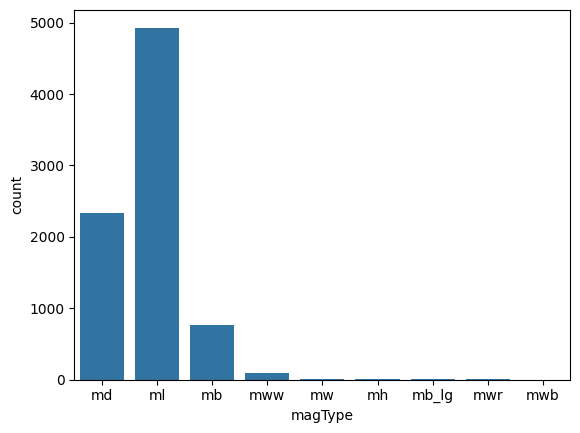

In [79]:
#Categorical
sns.countplot(df,x='magType')
plt.show()

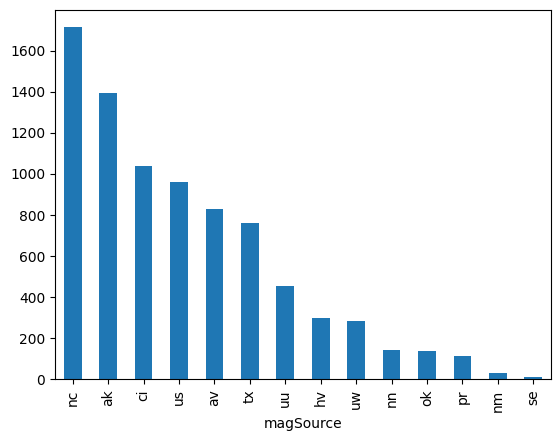

In [80]:
df['magSource'].value_counts().plot(kind='bar')
plt.show()

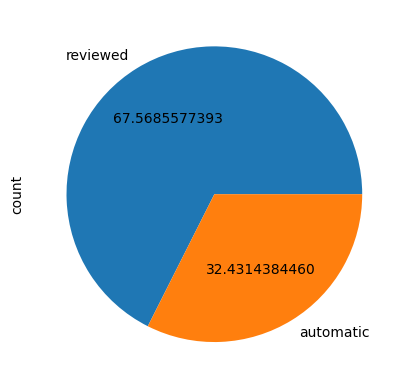

In [81]:
df['status'].value_counts().plot(kind='pie',autopct = '%.10f')
plt.show()

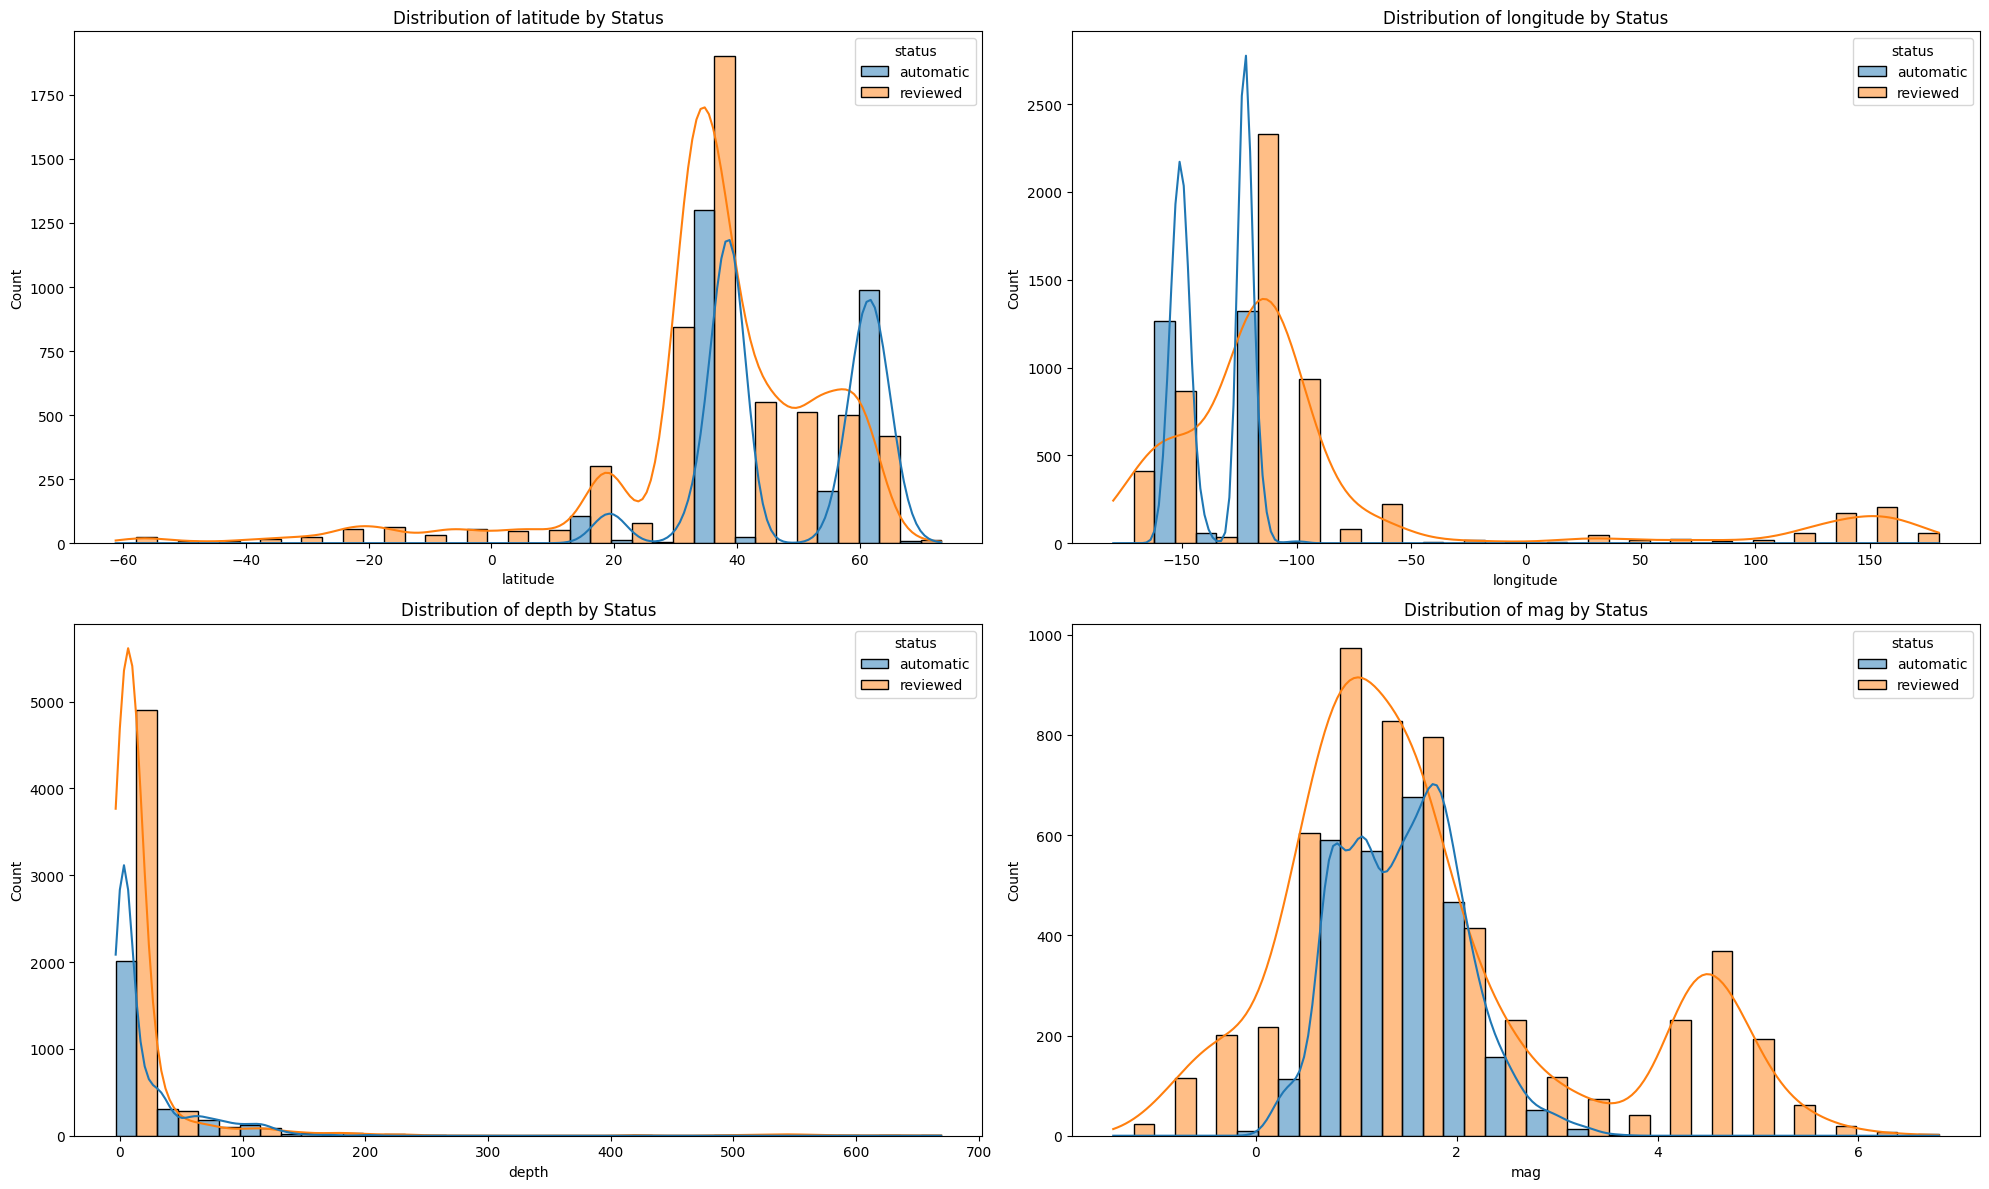

In [82]:
#Numericals

numerical_cols = ['latitude', 'longitude', 'depth', 'mag']

plt.figure(figsize=(20,12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        hue='status',
        multiple='dodge',
        kde=True,
        edgecolor='black',
        palette=['#1f77b4', '#ff7f0e']
    )
    plt.title(f"Distribution of {col} by Status")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

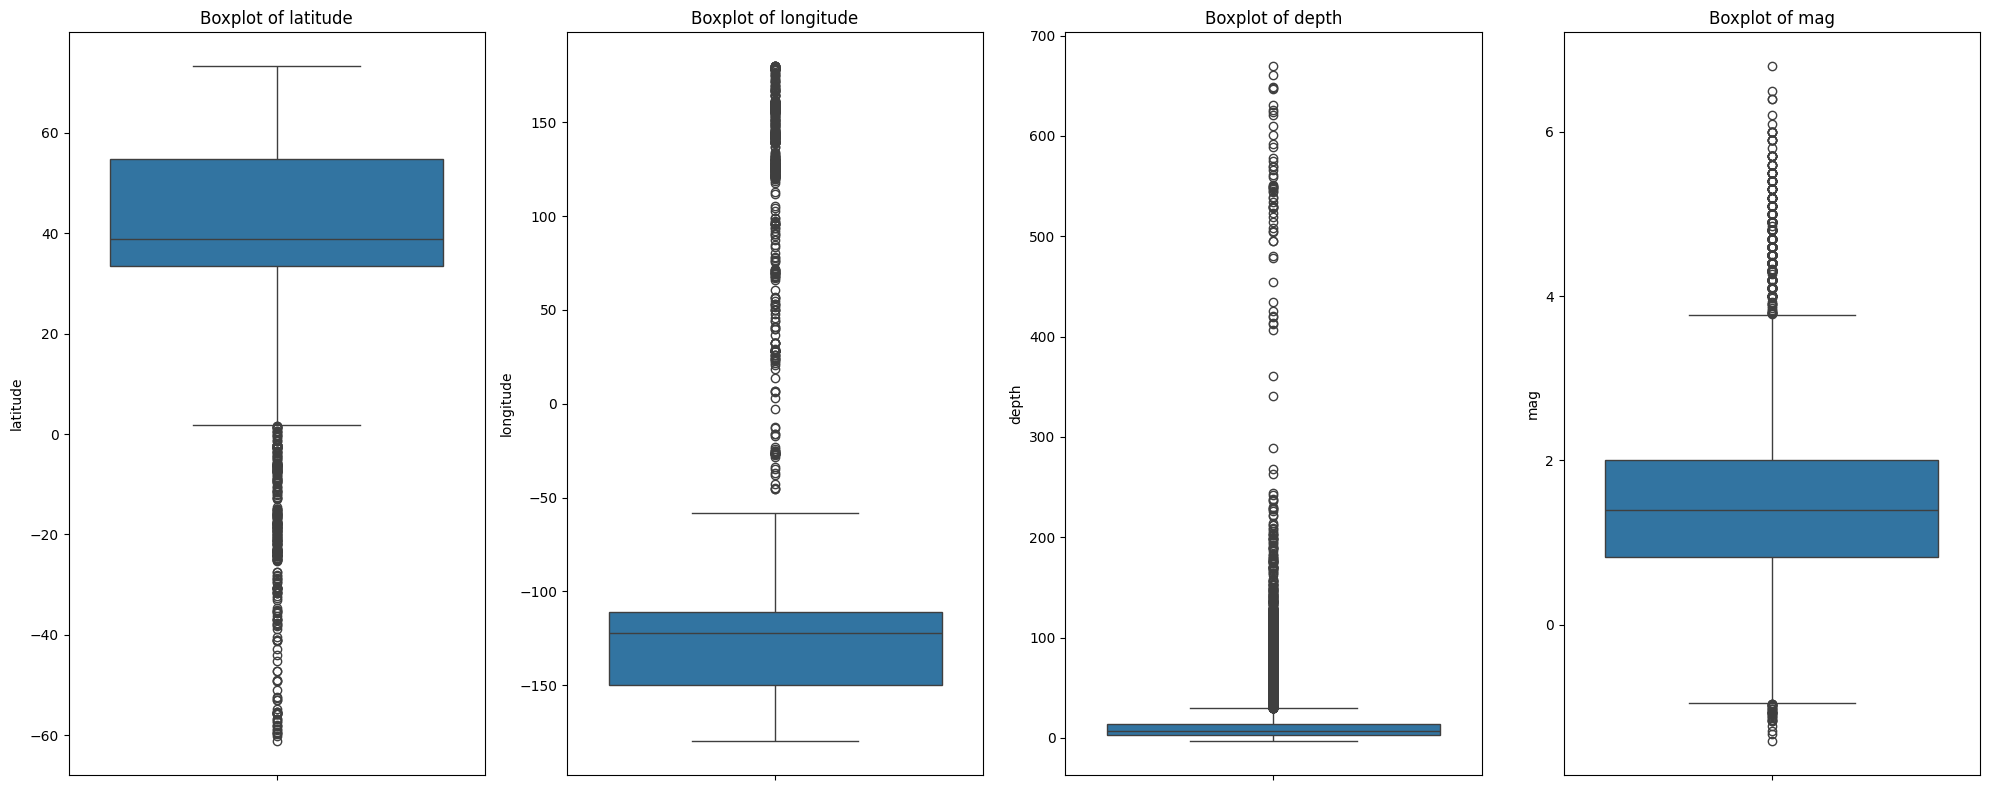

In [83]:
numerical_cols = ['latitude', 'longitude', 'depth', 'mag']

plt.figure(figsize=(20,8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)  # 1 row, n columns
    sns.boxplot(y=df[col], color='#1f77b4')
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis

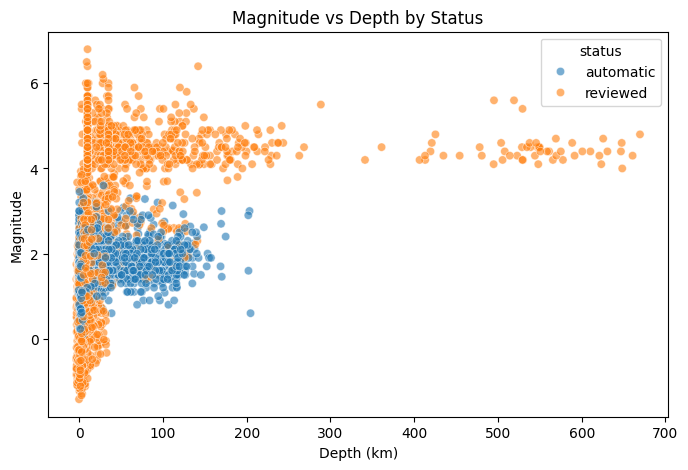

In [84]:
#Numerical vs Numerical
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='depth', y='mag', hue='status', alpha=0.6)
plt.title("Magnitude vs Depth by Status")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

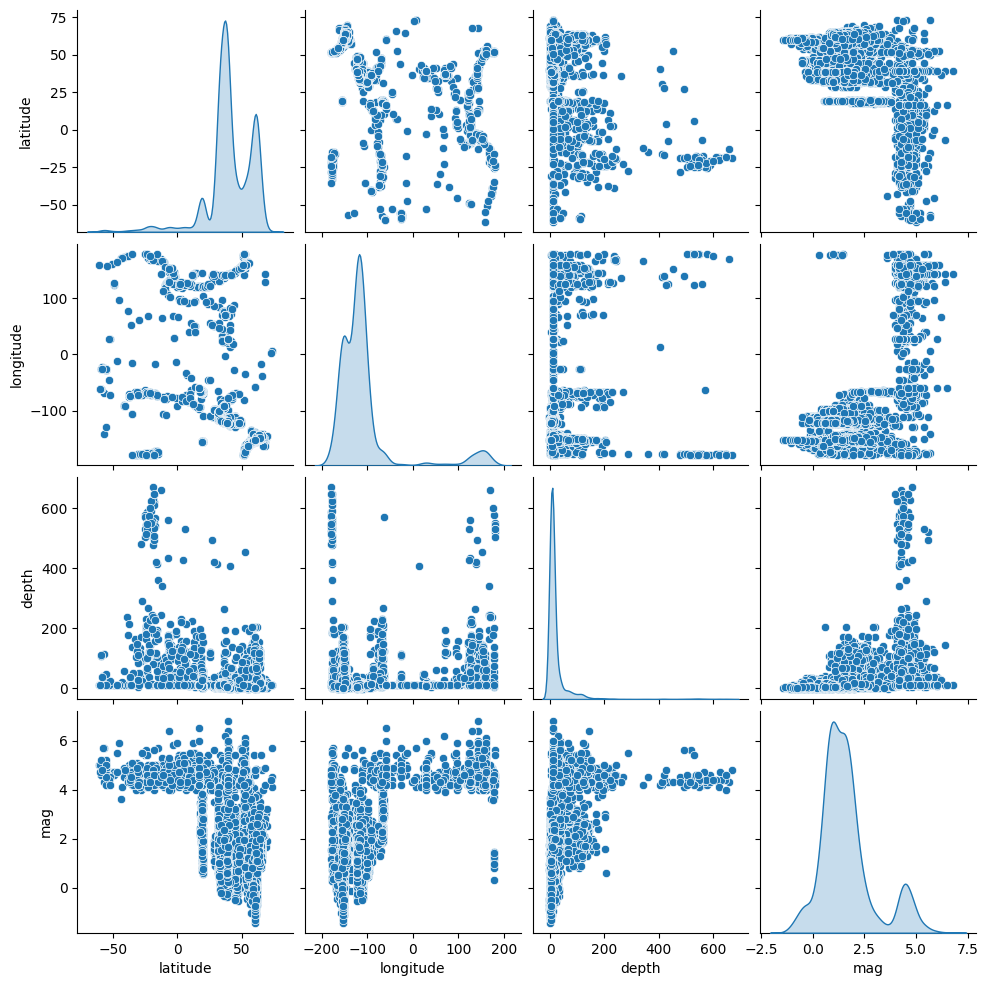

In [85]:
sns.pairplot(df[['latitude','longitude','depth','mag']],diag_kind='kde')
plt.show()


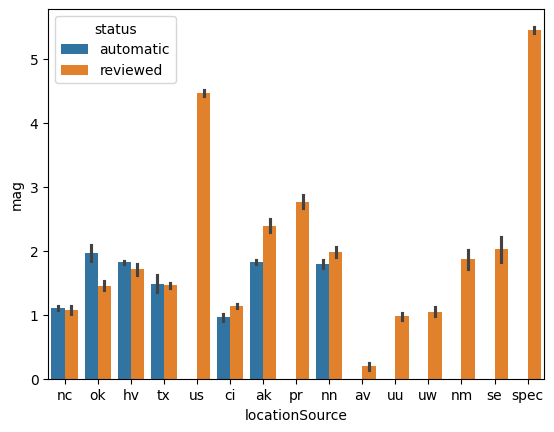

In [86]:
#Numerical vs Categorical
sns.barplot(data=df,x='locationSource',y='mag',hue='status')
plt.show()

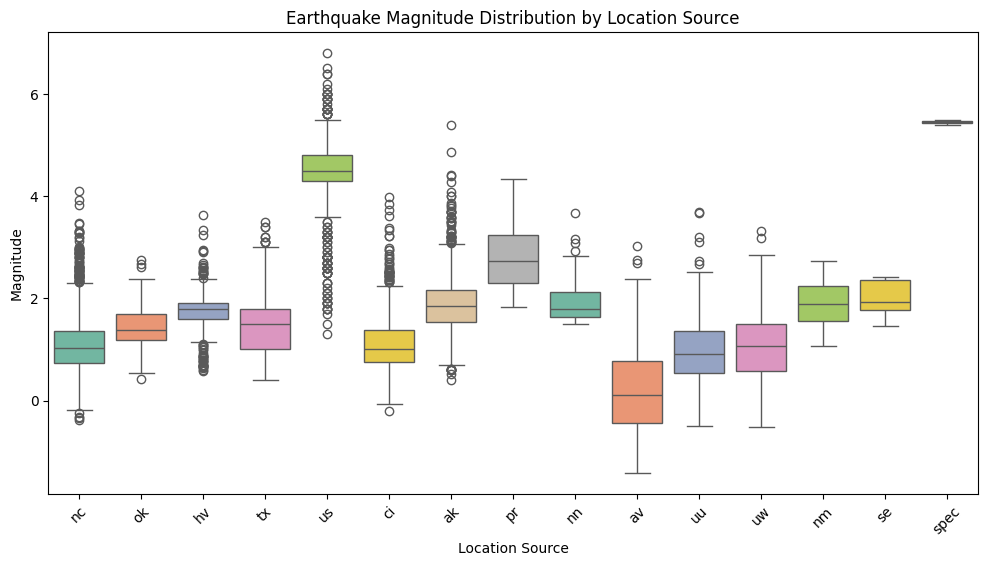

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='locationSource', y='mag', palette='Set2')
plt.title("Earthquake Magnitude Distribution by Location Source")
plt.xlabel("Location Source")
plt.ylabel("Magnitude")
plt.xticks(rotation=45)  # rotate labels to prevent overlap
plt.show()


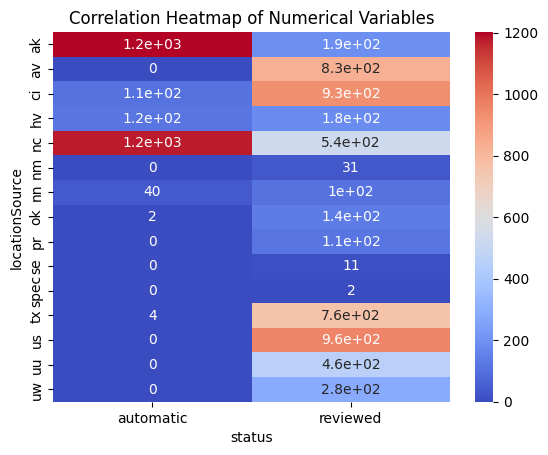

In [88]:
#Categorical vs Categorical
ct=pd.crosstab(df['locationSource'], df['status'])
sns.heatmap(ct,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


### Multivariate

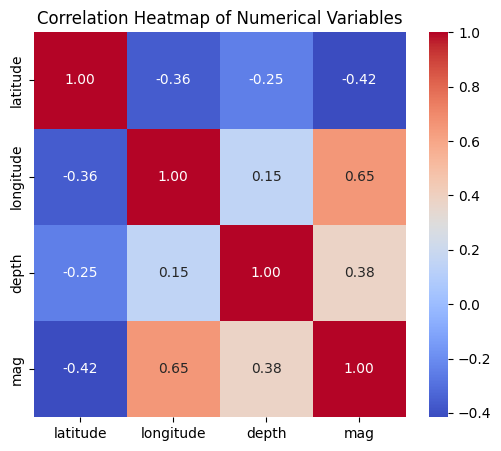

In [89]:

plt.figure(figsize=(6,5))
sns.heatmap(df[['latitude','longitude','depth','mag']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


## Observation --->
#####  The dataset contains outliers, which are retained to preserve important information.
#####  Features such as latitude, longitude, and depth are numeric and suitable for modeling.
#####  Some features are correlated, but all will be considered initially for clustering/modeling.
#####  The next steps are feature selection, model selection, and training.



# Feature Selection

In [90]:
X = df[['latitude','longitude','depth']]
X

,latitude,longitude,depth
0,39.302166,-123.230003,6.380000
1,34.300488,-97.587502,4.109524
2,19.162167,-155.374329,-0.570000
3,35.315437,-97.941772,7.483082
4,37.751335,-121.938499,4.760000
...,...,...,...
8163,50.631900,159.987700,10.000000
8164,38.741833,-122.826164,3.300000
8165,38.792667,-122.778503,2.990000
8166,60.015333,-153.065167,1.050000


# Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)

[[-0.0476106  -0.21353642 -0.27381112]
 [-0.3263256   0.14163594 -0.31719995]
 [-1.16989782 -0.65876503 -0.40662573]
 ...
 [-0.07600205 -0.20728272 -0.33859407]
 [ 1.10661599 -0.62678101 -0.3756675 ]
 [ 1.10884496 -0.62685026 -0.3691701 ]]


[1.80950196e-04 1.93254568e-04 2.15106998e-04 ... 3.02926174e+00
 3.83827821e+00 3.90083857e+00]


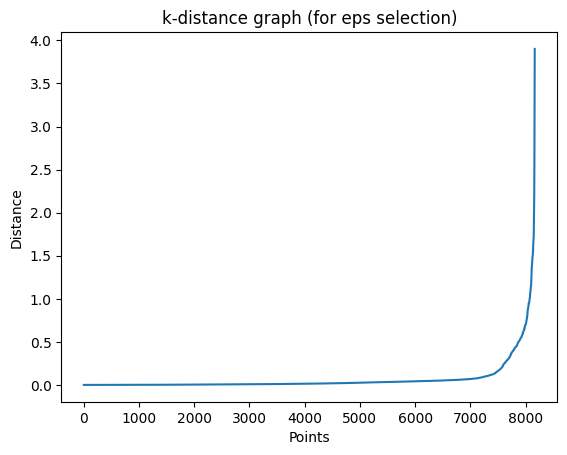

In [92]:
#Eps selection 

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)

distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 9]) # → rows and column slicing(all rows and 9th column)
print(distances)

plt.plot(distances)
plt.title("k-distance graph (for eps selection)")
plt.ylabel("Distance")
plt.xlabel("Points")
plt.show()


#Observation--> Here we can see eps is around 0.3

# Model_Selection

In [93]:
db = DBSCAN(eps=0.3, min_samples=10)
labels = db.fit_predict(X_scaled)

df['cluster'] = labels

print(df['cluster'].value_counts())


cluster
 0     4640
 2     2250
-1      398
 1      300
 4      184
 3      151
 5       82
 8       65
 7       47
 6       18
 10      14
 11      10
 9        9
Name: count, dtype: int64


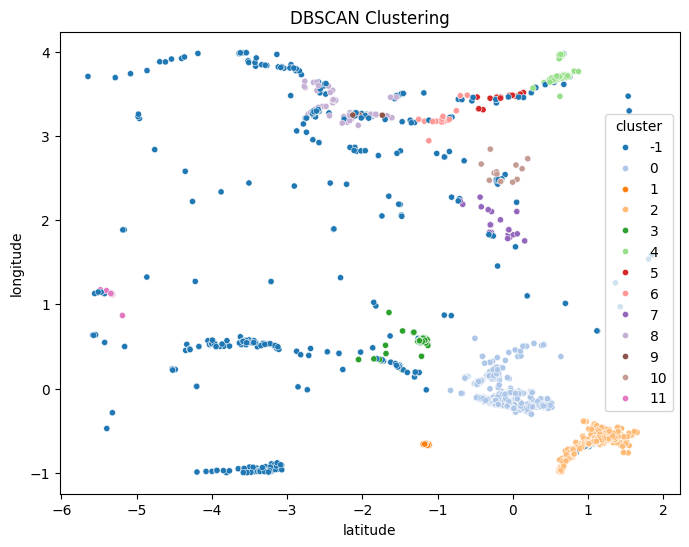

In [94]:
#With Noise

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0], # all rows,first column
    y=X_scaled[:,1], # all rows,second column
    hue=df['cluster'],      
    palette='tab20',
    s=20,
    legend='full' 
)
plt.title('DBSCAN Clustering')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()



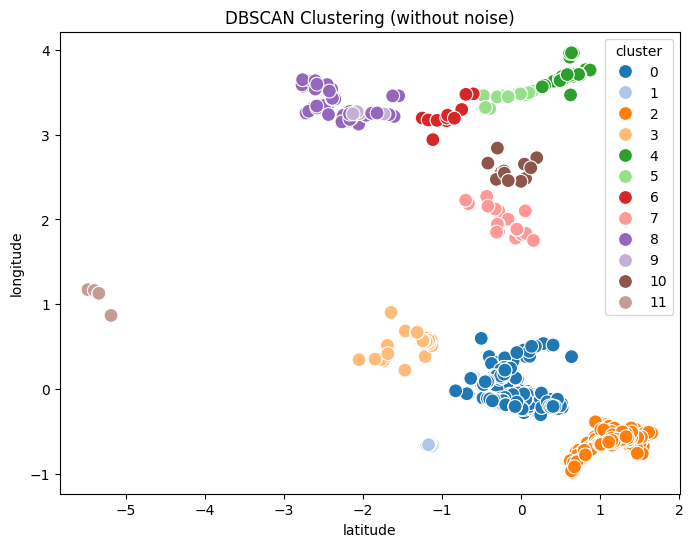

In [95]:
#Without Noise
mask = df['cluster'] != -1 # It checks each row in the cluster column of DataFrame for True and False(if -1 it is False)
df_clusters = df[mask] # Takes rows where mask is True and drops rows where mask is False 
X_clusters = X_scaled[mask] # selects only the rows where mask is True

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_clusters[:,0],
    y=X_clusters[:,1],
    hue=df_clusters['cluster'],
   
    palette='tab20',
    legend='full',
    s=100
)
plt.title('DBSCAN Clustering (without noise)')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

## Observation after Clustering

#####  DBSCAN identified multiple clusters in the dataset based on latitude, longitude, and depth.
##### Some points were labeled as noise (-1), indicating they do not belong to any cluster.
##### he clusters show natural groupings in the data, while noise points represent outliers.
##### Key features such as latitude, longitude, and depth were effective in capturing the spatial distribution of points.


In [96]:
#Cluster Grouping and its stastical values
cluster_stats = df_clusters.groupby('cluster')[['mag','depth']].agg(['mean','min','max','count'])
print(cluster_stats)


              mag                        depth                          
             mean   min   max count       mean     min         max count
cluster                                                                 
0        1.216405 -0.52  5.60  4640   6.063635  -3.390   39.690000  4640
1        1.763733  0.57  3.64   300  19.941797  -1.350   53.060001   300
2        1.303071 -1.42  5.50  2250  27.672917  -3.190  170.217148  2250
3        3.295762  1.84  6.50   151  19.416940   3.530   81.000000   151
4        4.443834  0.33  6.10   184  35.081835   2.910   99.322000   184
5        4.913415  4.20  6.80    82  19.476756   9.446   57.278000    82
6        4.544444  4.20  5.10    18  12.153056   9.932   24.141000    18
7        4.508511  4.00  6.00    47  10.544106   8.000   23.329000    47
8        4.693846  4.00  5.40    65  20.530200   9.288   56.577000    65
9        4.666667  4.20  5.40     9  62.667000  54.480   73.622000     9
10       4.342857  3.90  5.00    14  10.706571  10.

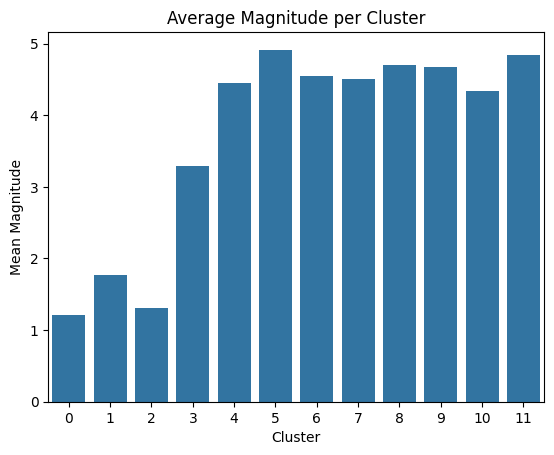

In [97]:
sns.barplot(x=cluster_stats.index, y=cluster_stats['mag']['mean'])
plt.title('Average Magnitude per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Magnitude')
plt.show()


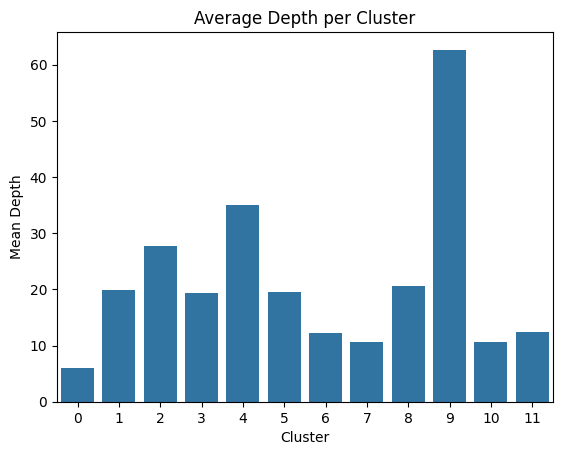

In [98]:
sns.barplot(x=cluster_stats.index, y=cluster_stats['depth']['mean'])
plt.title('Average Depth per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Depth')
plt.show()


### Observation-->
#### Some clusters correspond to high-magnitude earthquakes.
#### Some clusters represent deep earthquakes based on depth.

In [99]:
## silhouette
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['cluster'])
print(score)


0.582495699801032


In [ ]:
#Visualization on WorldMap

import plotly.express as px
# Filter clustered points (optional)
df_clusters = df[df['cluster'] != -1].copy()

# Shift magnitude so all sizes are positive
df_clusters['mag_shifted'] = df_clusters['mag'] - df_clusters['mag'].min() + 0.1

# Create interactive world map
fig = px.scatter_geo(
    df_clusters,
    lat='latitude',
    lon='longitude',
    color='mag',              
    size='mag_shifted',       
    hover_name='locationSource',  
    hover_data=['depth','mag','cluster'],
    projection='natural earth',   # world map projection
    color_continuous_scale='Viridis',
    title='Earthquake Distribution on World Map'
)
fig.show(renderer="browser")


## Anomaly Detection

In [106]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso.fit_predict(X_scaled)
df['anomaly'] = anomalies # -1 = anomaly, 1 = normal




In [108]:
# Compare with  noise points and Anomaly:

# DBSCAN noise points
dbscan_noise = df[df['cluster'] == -1]

# Anomaly points
anomaly_points = df[df['anomaly'] == -1]

# Compare the two
print("DBSCAN noise points:", len(dbscan_noise))
print("Anomaly points:", len(anomaly_points))

# Points that are both DBSCAN noise and anomalies
both = df[(df['cluster'] == -1) & (df['anomaly'] == -1)]
print("Points that are both DBSCAN noise and anomalies:", len(both))


DBSCAN noise points: 398
Anomaly points: 409
Points that are both DBSCAN noise and anomalies: 319


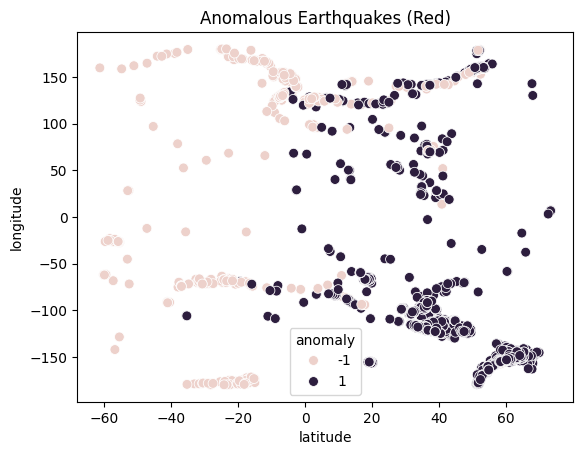

In [ ]:
# Visualize anomalies:
sns.scatterplot(
    x=df['latitude'],
    y=df['longitude'],
    hue=df['anomaly'],
    s=50
)
plt.title('Anomalous Earthquakes (Red)')
plt.show()


In [ ]:

# Detect unusual or extreme earthquakes (Anomaly Detection)
anomaly_stats = df[df['anomaly'] == -1][['latitude','longitude','depth','mag']]
print(anomaly_stats)


      latitude  longitude    depth  mag
7       5.2892   127.1882  126.989  4.8
17    -21.8419   -68.7230  150.752  4.5
18    -51.0362   161.9946   10.000  4.7
29      2.4703    98.9235  156.190  4.9
46    -17.4078  -178.7411  565.578  4.2
...        ...        ...      ...  ...
8114  -30.6357   -71.8316   26.997  4.2
8136  -18.1439  -179.3826  647.752  4.6
8142  -21.6349   -68.4385  120.808  4.3
8151  -12.8312   143.1764   10.000  4.5
8154  -11.4036   112.9670   32.527  4.6

[409 rows x 4 columns]


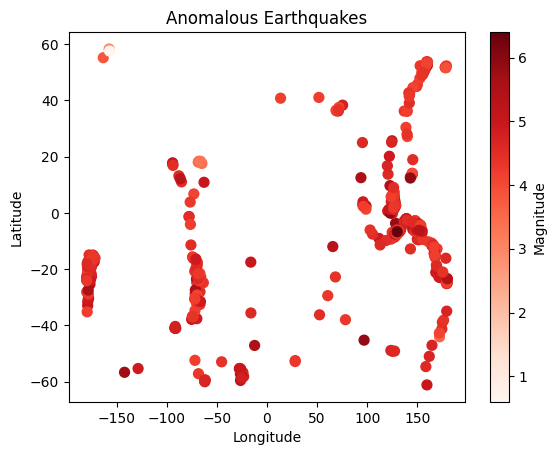

In [ ]:

 # Unusual or extreme earthquakes Visualization (Anomaly Detection)
plt.scatter(anomaly_stats['longitude'], anomaly_stats['latitude'],s=50, c=anomaly_stats['mag'], cmap='Reds')
plt.colorbar(label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomalous Earthquakes')
plt.show()


## System Observations

1. DBSCAN identified clusters of earthquakes based on location, depth, and magnitude.
2. Noise points (-1) from DBSCAN are potential anomalous or extreme events.
3. Isolation Forest confirms anomalies(-1) with extreme magnitudes or unusual depths.


